<center><h2><strong><font color="blue">Pendahuluan Data Mining</font></strong></h2></center>
<center><h3><strong><font color="blue"><a href="https://tau-data.id/course/adm/"> https://tau-data.id/course/adm/ </a></font></strong></h3></center>

<img alt="" src="images/Cover_ADM.png" />

<center><h2><strong><font color="blue">Supervised Learning - Classification 02</font></strong></h2></center>
<center><font color="blue">Decision Tree, Random Forest, and Naive Bayes Classifier</font></center>
<center><h3><strong><font color="blue"><a href="https://tau-data.id/lesson/adm-classification-02/">https://tau-data.id/lesson/adm-classification-02/</a></font></strong></h3></center>
<b><center><h3>(C) Taufik Sutanto</h3></center>

# Outline:

* Random Forest
* Neural Network
* Model Selection

In [ ]:
# Cell ini dijalankan HANYA jika menggunakan Google Colab. 
# Jika di jalankan di Jupyter Notebook sebaiknya di jalankan di terminal (command prompt) tanpa tanda "!" 

!pip install graphviz
!pip install dtreeviz
!pip install imblearn
!mkdir data
!wget -P data/ https://raw.githubusercontent.com/taufikedys/UMI/master/data/diabetes_data.csv
!wget -P data/ https://raw.githubusercontent.com/taufikedys/UMI/master/data/hr_data.csv

In [13]:
# Importing Modules untuk Notebook ini
#from imblearn.datasets import make_imbalance
import warnings; warnings.simplefilter('ignore')

import graphviz, pandas as pd, matplotlib.pyplot as plt, numpy as np, seaborn as sns
from pandas.plotting import scatter_matrix 
from sklearn import model_selection, tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from dtreeviz.trees import *
from IPython.core.display import display, HTML
from imblearn.under_sampling import NearMiss # underSampling
from imblearn.over_sampling import SMOTE # OverSampling
from imblearn.combine import SMOTEENN # Combination of the 2
from imblearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced
import numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import svm, preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from collections import Counter
sns.set(style="ticks", color_codes=True)

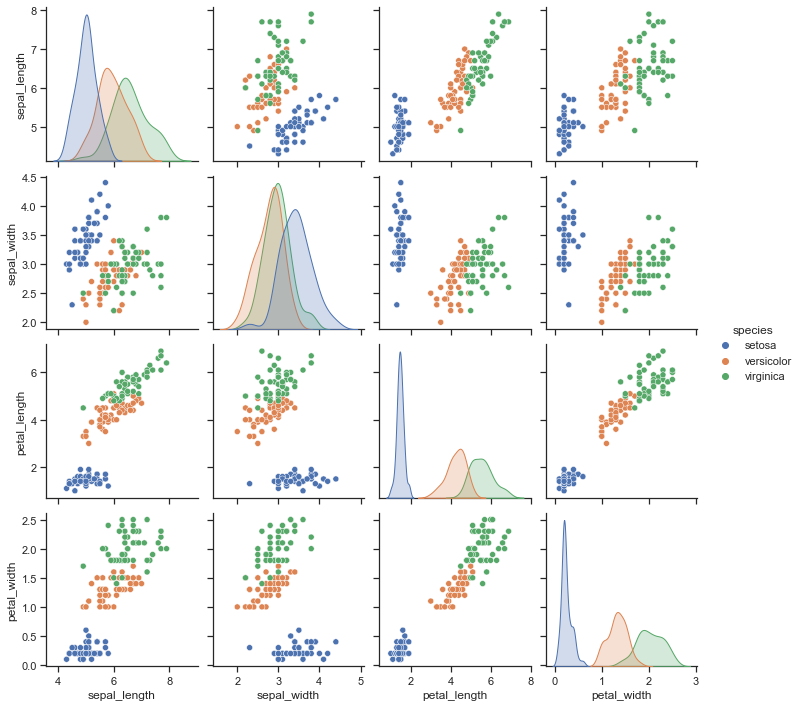

In [14]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, seaborn as sns

# load the iris data
df = sns.load_dataset("iris")
g = sns.pairplot(df, hue="species")

In [15]:
df.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [16]:
# Separate Data
X = df[['sepal_length','sepal_width','petal_length','petal_width']]
Y = df['species']
seed = 9
validation_size = 0.3
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)
print(X_train.shape, len(Y_test))

(105, 4) 45


In [17]:
# Build the model and Evaluate
dt_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=seed) # Default Gini
dt = dt_model.fit(X_train, Y_train)
dt_prediction = dt.predict(X_test)
print('Akurasi = ', accuracy_score(Y_test, dt_prediction))
print(confusion_matrix(Y_test, dt_prediction))
print(classification_report(Y_test, dt_prediction))

Akurasi =  0.9777777777777777
[[18  0  0]
 [ 0 14  0]
 [ 0  1 12]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.93      1.00      0.97        14
   virginica       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



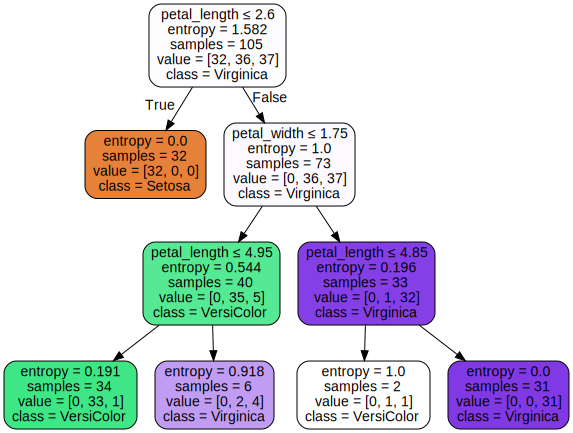

In [18]:
# "May" (mungkin) not work in Google Colab, use Anaconda/WinPython

dot_data = tree.export_graphviz(dt, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 
var_names = ['sepal_length','sepal_width', 'petal_length','petal_width']
categories = ['Setosa', 'VersiColor', 'Virginica']
dot_data = tree.export_graphviz(dt, out_file=None, 
                         feature_names = var_names,  
                         class_names=categories,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 
# Interpretation is much easier from the graph
# Installing GraphViz : https://stackoverflow.com/questions/49471867/installing-graphviz-for-use-with-python-3-on-windows-10

In [19]:
# Varible importance
dt.feature_importances_

array([0.        , 0.        , 0.70559151, 0.29440849])

In [20]:
# Mari coba perbaiki dengan Random Forest
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
rf_prediction = rf.predict(X_test)
print('Akurasi = ', accuracy_score(Y_test, rf_prediction))
print(confusion_matrix(Y_test, rf_prediction))
print(classification_report(Y_test, rf_prediction))
# Ensemble less effective on strong classifiers

Akurasi =  1.0
[[18  0  0]
 [ 0 14  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       1.00      1.00      1.00        14
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Feature ranking:
1. feature 3 (0.456971)
2. feature 2 (0.420553)
3. feature 0 (0.084873)
4. feature 1 (0.037603)


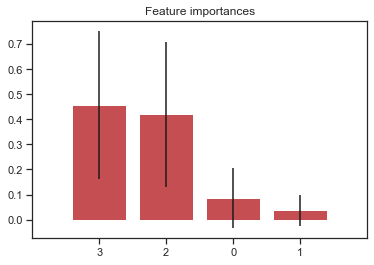

In [21]:
# Varible importance
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [22]:
# Contoh
df = pd.DataFrame({'X1': ['a', 'b', 'a','c','a'],'X2': [1, 2, 3, 2, 1]})
df = pd.get_dummies(df) # get_dummies(df, prefix=['dummy'])
df

,X2,X1_a,X1_b,X1_c
0,1,1,0,0
1,2,0,1,0
2,3,1,0,0
3,2,0,0,1
4,1,1,0,0


In [23]:
scaler = preprocessing.StandardScaler(with_mean=True, with_std=True)
df['X2'] = scaler.fit_transform(df[['X2']])
df

,X2,X1_a,X1_b,X1_c
0,-1.069045,1,0,0
1,0.267261,0,1,0
2,1.603567,1,0,0
3,0.267261,0,0,1
4,-1.069045,1,0,0


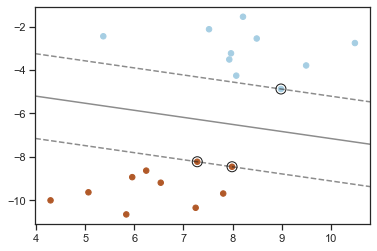

In [24]:
# Contoh plotting Optimal Hyperplane
# http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#example-svm-plot-separating-hyperplane-py

X, y = make_blobs(n_samples=20, centers=2, random_state=6) # we create 20 separable points
clf = svm.SVC(kernel='linear', C=1000) # fit the model, don't regularize for illustration purposes
clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca();xlim = ax.get_xlim(); ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30);yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])# plot decision boundary and margins
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,linewidth=1, facecolors='none', edgecolors='k')# plot support vectors
plt.show()

In [25]:
# Contoh Binary SVM (dengan dan tanpa kernel)
# Loading Data
df = sns.load_dataset("iris")
df2 = df[df['species'].isin(['setosa','versicolor'])]
print(df2.shape)
df2.sample(7)

(100, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
75,6.6,3.0,4.4,1.4,versicolor
63,6.1,2.9,4.7,1.4,versicolor
10,5.4,3.7,1.5,0.2,setosa
81,5.5,2.4,3.7,1.0,versicolor
71,6.1,2.8,4.0,1.3,versicolor
70,5.9,3.2,4.8,1.8,versicolor
93,5.0,2.3,3.3,1.0,versicolor


In [26]:
# Separate the data
X = df2[['sepal_length','sepal_width','petal_length','petal_width']]
Y = df2['species']
seed = 9
validation_size = 0.3
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)
print(X_train.shape, len(Y_test))

(70, 4) 30


In [27]:
# Fitting and evaluate the model
dSVM = svm.SVC(C = 10**5, kernel = 'linear')
dSVM.fit(X_train, Y_train)
y_SVM = dSVM.predict(X_test)
print('Akurasi = ', accuracy_score(Y_test, y_SVM))
print(confusion_matrix(Y_test, y_SVM))
print(classification_report(Y_test, y_SVM))

Akurasi =  1.0
[[18  0]
 [ 0 12]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [28]:
# The Support Vectors
print('index dr SV-nya: ', dSVM.support_)
print('Vector Datanya: \n', dSVM.support_vectors_)

index dr SV-nya:  [21 37]
Vector Datanya: 
 [[4.8 3.4 1.9 0.2]
 [5.1 2.5 3.  1.1]]


In [29]:
# Model Weights for interpretations
print('w = ',dSVM.coef_)
print('b = ',dSVM.intercept_)

w =  [[ 0.20547963 -0.61643888  0.7534253   0.61643888]]
b =  [-1.44520713]


In [30]:
# Menggunakan Kernel: http://scikit-learn.org/stable/modules/svm.html#svm-kernels
for kernel in ('sigmoid', 'poly', 'rbf'):
    dSVM = svm.SVC(kernel=kernel)
    dSVM.fit(X_train, Y_train)
    y_SVM = dSVM.predict(X_test)
    print(accuracy_score(Y_test, y_SVM))

0.4
1.0
1.0


In [31]:
# Contoh Multiklasifikasi SVM (dengan dan tanpa kernel)
# Separate the data
X = df[['sepal_length','sepal_width','petal_length','petal_width']]
Y = df['species']
seed = 9
validation_size = 0.3
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)
print(X_train.shape, len(Y_test))

(105, 4) 45


In [32]:
# One Versus All: http://www.jmlr.org/papers/volume5/rifkin04a/rifkin04a.pdf
dSVM = svm.LinearSVC()
dSVM.fit(X_train, Y_train)
y_SVM = dSVM.predict(X_test)
print('Akurasi = ', accuracy_score(Y_test, y_SVM))
y_SVM

Akurasi =  1.0


array(['virginica', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa', 'setosa',
       'virginica', 'setosa', 'virginica', 'versicolor', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica'], dtype=object)

In [33]:
# Ada 3 classifier (as expected)
dSVM.coef_

array([[ 0.21102581,  0.39116521, -0.78332214, -0.39840045],
       [ 0.07940482, -0.72460225,  0.27113101, -0.67144163],
       [-0.78637112, -0.97105826,  1.35334759,  1.59073256]])

In [34]:
# All At Once Method http://www.jmlr.org/papers/volume2/crammer01a/crammer01a.pdf
dSVM = svm.SVC(decision_function_shape='ovo')
dSVM.fit(X_train, Y_train)
y_SVM = dSVM.predict(X_test)
print('Akurasi = ', accuracy_score(Y_test, y_SVM))
y_SVM

Akurasi =  0.9777777777777777


array(['virginica', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa', 'setosa',
       'virginica', 'setosa', 'virginica', 'versicolor', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica'], dtype=object)

In [35]:
# Neural Network: http://scikit-learn.org/stable/modules/neural_networks_supervised.html
NN = MLPClassifier(hidden_layer_sizes=(100,))# 2 layers 30 neurons and 20 neurons
NN.fit(X_train, Y_train)
y_NN = NN.predict(X_test)
print('Akurasi = ', accuracy_score(Y_test, y_NN))

Akurasi =  1.0


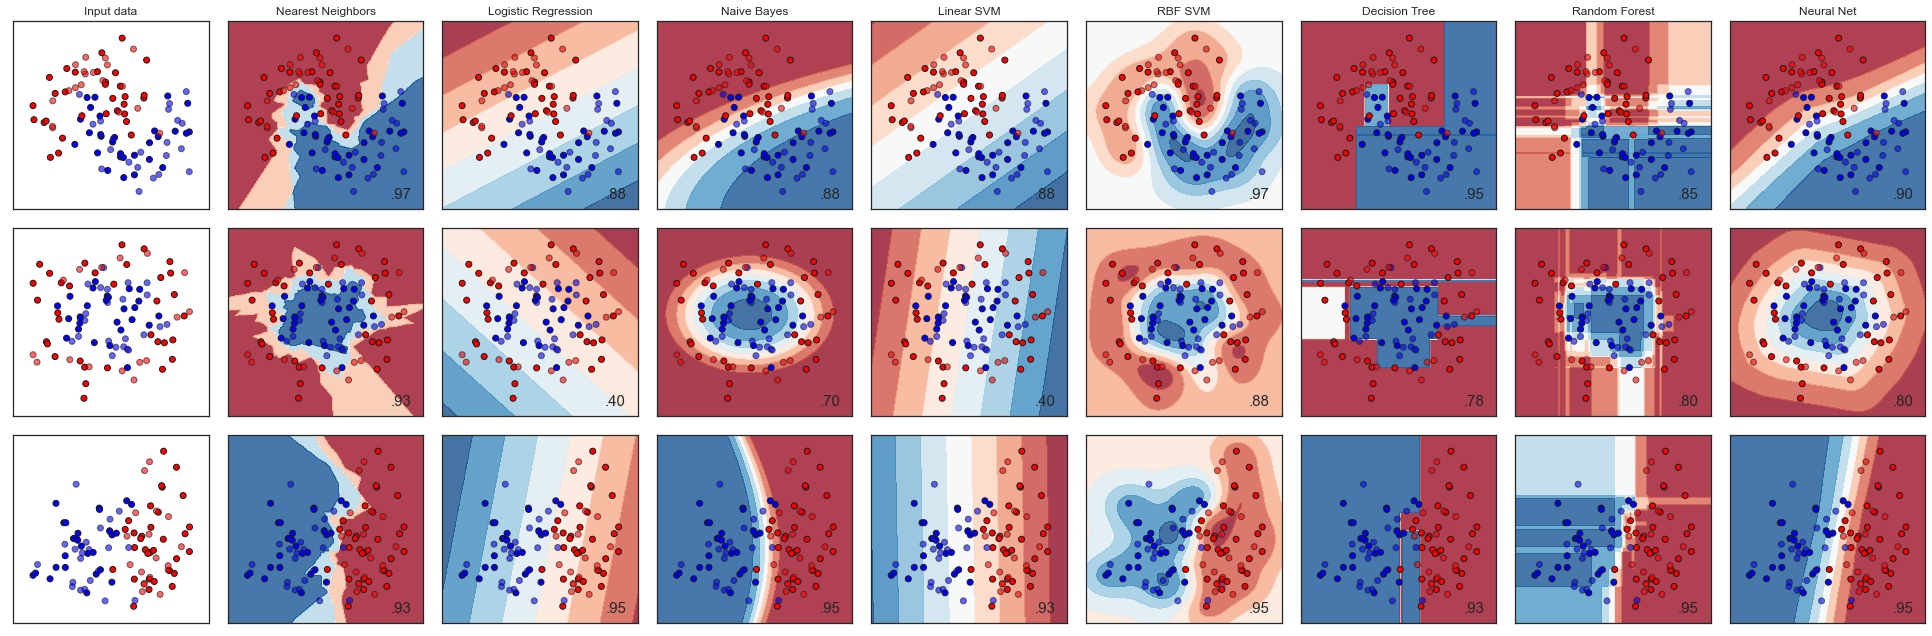

In [36]:
h, i = .02, 1  # step size in the mesh , iterate over datasets
names = ["Nearest Neighbors", "Logistic Regression", "Naive Bayes", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "Neural Net"]

classifiers = [KNeighborsClassifier(3),
    LogisticRegression(solver='lbfgs',multi_class='multinomial'),
    GaussianNB(), SVC(kernel="linear", C=0.025), SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1)]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),make_circles(noise=0.2, factor=0.5, random_state=1),linearly_separable]
figure = plt.figure(figsize=(27, 9))

for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = preprocessing.StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max()); ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(()); ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max());ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(()); ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout();plt.show()

<h1>End of Module</h1>
<hr />